# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import nxviz
import community
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import operator

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('../data/us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
def df_to_dfgraph(df, nodes, edges):
    
    """
    Crea un dataframe con las relaciones entre los nodos.
    Input : 
    *df: dataframe origen
    *nodes : columna del df que quiere usarse de nodos
    *edges : columna del df que quiere usarse de enlace
    
    Output:
    *df: con las relaciones
    
    """
    
    #Con esto obtenemos la lista de tuplas
    lst = [(df[edges][i],df[nodes][i]) for i in range(0, len(df[nodes]))]
    #Pasamos a diccionario
    d = {}
    for k, v in lst:
        d.setdefault(k, []).append(v)
    #Creamos las permutaciones de los valores del dict
    lst2 = [list(itertools.combinations(i, 2)) for i in d.values()]
    #Por último sacamos las tuplas de las listas para obtener solo una lista de tuplas y no una lista
    #de listas de tuplas.
    total_relationships=[]
    for i in lst2:
        for e in i:
            total_relationships.append(e)
    #Convertimos el listado de tuplas en un dataframe
    df = pd.DataFrame(total_relationships, columns = ["Name_x", "Name_y"])
        
    return df

In [5]:
data = df_to_dfgraph(basketball, "Name", "Games")

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [6]:
G = nx.from_pandas_edgelist(data, 'Name_x', 'Name_y')

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [7]:
def info_graph(graph):
    print(f"______Graph info______")
    print("Number of nodes: ", G.size())
    print("Number of edges: ", G.order())
    print("Average degree: ", nx.average_degree_connectivity(G))
    print("Density: ", nx.density(G))

In [8]:
info_graph(G)

______Graph info______
Number of nodes:  1232
Number of edges:  196
Average degree:  {11: 13.214141414141414, 22: 13.530303030303031, 20: 14.15, 21: 13.785714285714286, 28: 13.714285714285714, 36: 13.027777777777779, 19: 15.210526315789474, 26: 13.807692307692308, 18: 15.896825396825397, 13: 13.90138067061144, 24: 13.083333333333334}
Density:  0.06446886446886448


## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [53]:
def draw(G, pos, measures, measure_name, logscale=False, labels=False):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap="Greens", 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_edgecolor('k')
    
    if logscale:
        nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    if labels:
        labels = nx.draw_networkx_labels(G, pos)
        
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [101]:
def sorted_betweenness (G, num):
    
    """
    Devuelve el número de nodos más centrales
    """
    
    ebet = nx.betweenness_centrality(G)
    sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
    print(pd.DataFrame(sorted_ebet[0:num],columns=["Player Name", "Betweenness Centrality"]))
    return draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

                      Player Name  Betweenness Centrality
0              Gary Dwayne Payton                0.091938
1            Jason Frederick Kidd                0.091356
2            Carmelo Kyan Anthony                0.047423
3          David Maurice Robinson                0.032662
4  William Marion "Bill" Hougland                0.030241


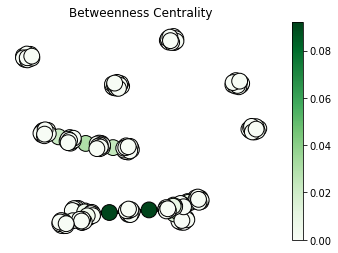

In [102]:
sorted_betweenness(G, 5)

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [99]:
def sorted_eigenvector (G, num):
    ebet = nx.algorithms.centrality.eigenvector_centrality(G,max_iter=500)
    sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
    print(pd.DataFrame(sorted_ebet[0:num], columns=["Player Name", "Eigenvector Centrality"]))
    return draw(G, pos, nx.eigenvector_centrality(G, max_iter=500), 'Eigenvector Centrality')

                         Player Name  Eigenvector Centrality
0               Carmelo Kyan Anthony                0.341810
1               LeBron Raymone James                0.288421
2                   Kobe Bean Bryant                0.224292
3  Christopher Emmanuel "Chris" Paul                0.224292
4             Deron Michael Williams                0.224292


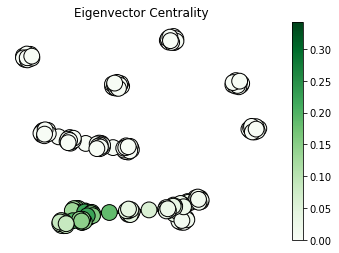

In [100]:
sorted_eigenvector(G, 5)

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [97]:
def sorted_degree_centrality (G, num):
    
    """
    Devuelve el número de nodos más centrales
    """
    
    ebet = nx.degree_centrality(G)
    sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
    print(pd.DataFrame(sorted_ebet[0:num], columns=["Player Name", "Degree centrality"]))
    return draw(G, pos, nx.degree_centrality(G), 'Degree centrality')

                      Player Name  Degree centrality
0            Carmelo Kyan Anthony           0.184615
1          David Maurice Robinson           0.143590
2            LeBron Raymone James           0.133333
3     Robert Albert "Bob" Kurland           0.133333
4  William Marion "Bill" Hougland           0.123077


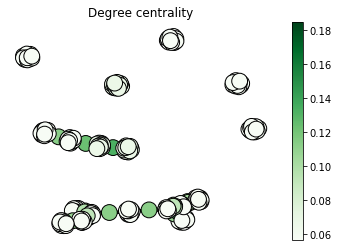

In [98]:
sorted_degree_centrality(G,5)

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

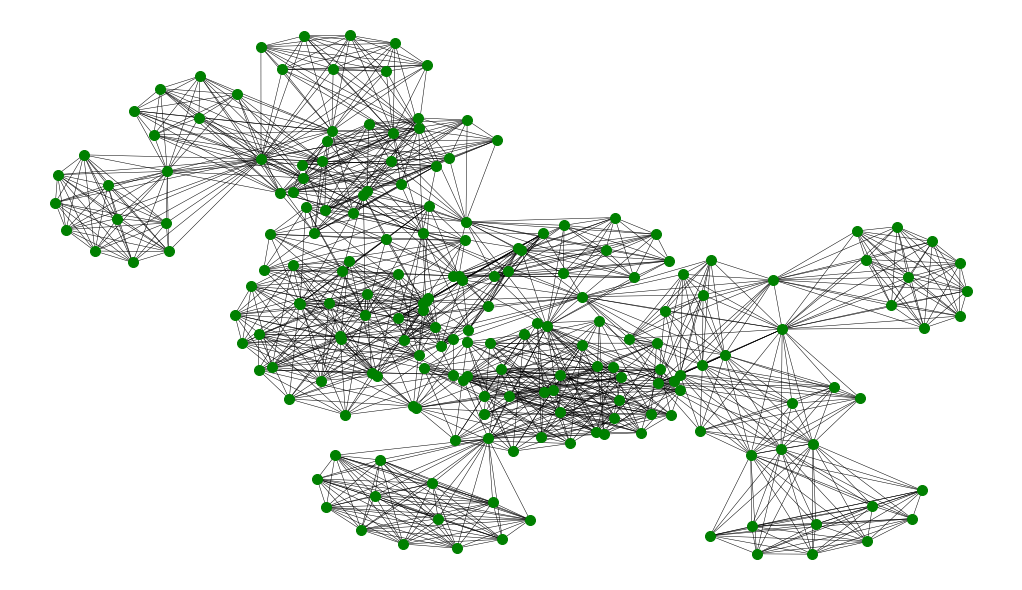

In [75]:
plt.figure(figsize=(14,8))

nx.draw_kamada_kawai(G, node_size=100, node_color='green', alpha=1,width=0.5)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

In [28]:
ego = nx.ego_graph(G, sorted_betweenness(G, 1)[0][0], radius=1)

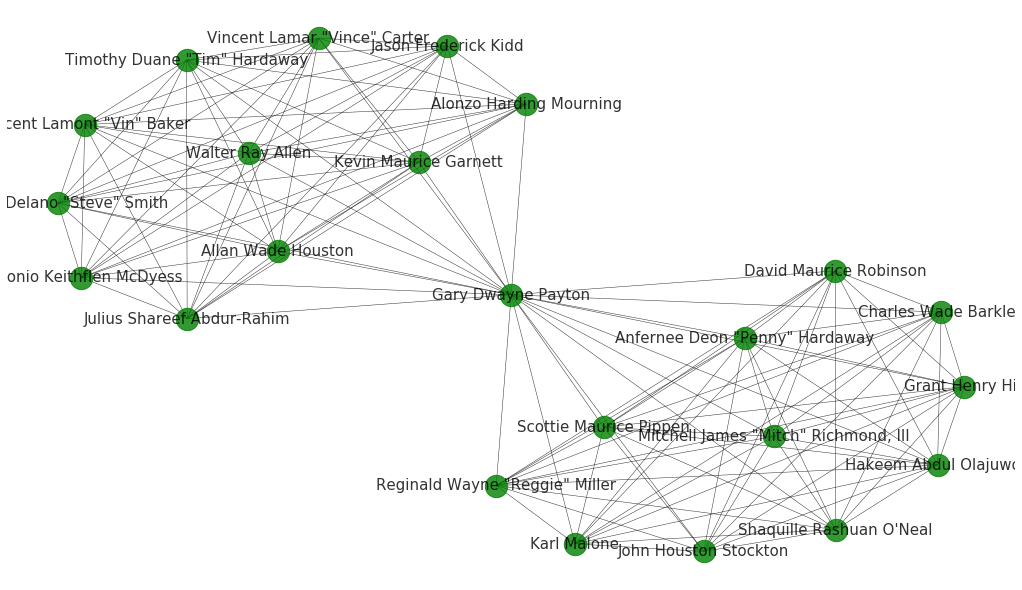

In [67]:
plt.figure(figsize=(14,8))
nx.draw_kamada_kawai(ego, node_size=500, node_color='green', alpha=0.8, width=0.5, with_labels=True, font_size=15)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [72]:
parts = community.community_louvain.best_partition(G)
values = list(parts.values())

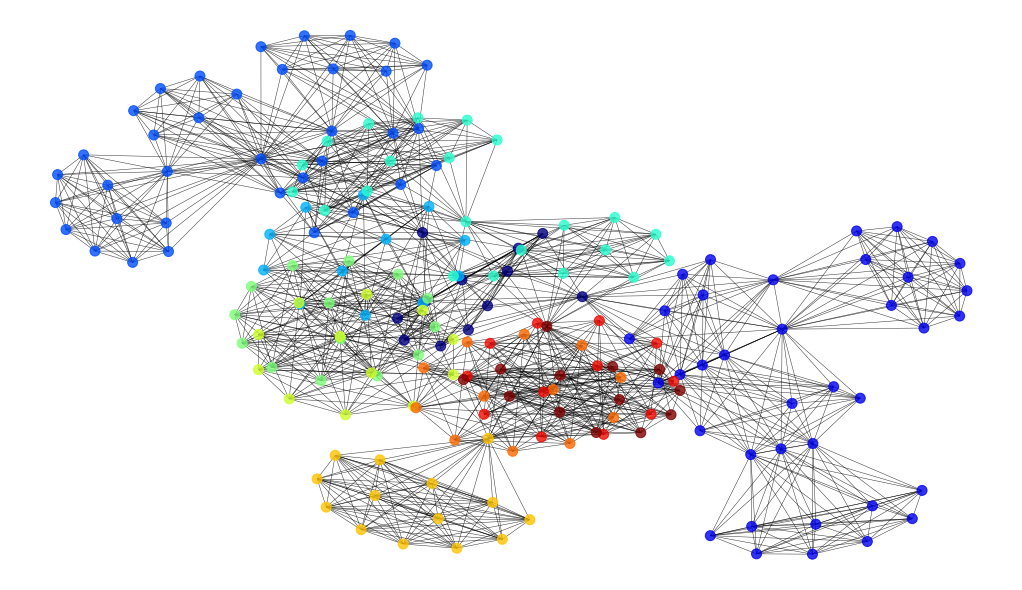

In [106]:
plt.figure(figsize=(14,8))
nx.draw_kamada_kawai(G, node_size=100, alpha=0.8, width=0.5,node_color=values, cmap="jet")

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

### Generate a network visualization of this graph using the layout of your choice.